# Titanic Machine Learning from Disaster

## About the dataset:
This dataset is taken from Kaggle Competition 'Titanic: Machine Learning from Disaster'.

## Importing the libraries

In [36]:
import numpy as np
np.set_printoptions(precision=4)

import pandas as pd

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(10, 6))

In [37]:
import seaborn as sns

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Importing the dataset

In [7]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyzing and modifying the train set

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [9]:
# Checking for uniformity in each column.
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
len(df_train.Age.unique())

89

In [12]:
df_train.Age.isnull().sum()

177

In [13]:
# Filling the missing values in Age with 0 in a new column.
df_train['Age_No_NA'] = df_train.Age.fillna(0)

In [14]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
len(df_train.Ticket.unique())

681

In [17]:
len(df_train.Fare.unique())

248

In [18]:
len(df_train.Cabin.unique())

148

In [19]:
df_train.Cabin.isnull().sum()

687

In [20]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df_train.Embarked.isnull().sum()

2

In [22]:
# Dropping the rows with NA value from Embarked column.
df_train.drop(df_train[df_train.Embarked.isnull()].index, inplace=True)

In [82]:
df_train[df_train.Cabin.notnull()].Pclass.value_counts()

1    174
2     16
3     12
Name: Pclass, dtype: int64

In [23]:
df_train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Age_No_NA      889 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 79.9+ KB


## Exploratory Data Analysis

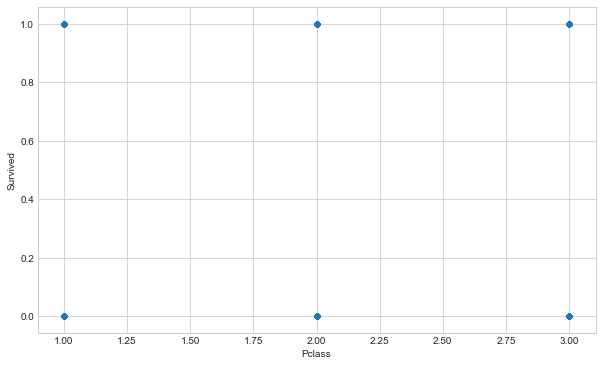

In [28]:
df_train.plot.scatter('Pclass', 'Survived', alpha=0.4)

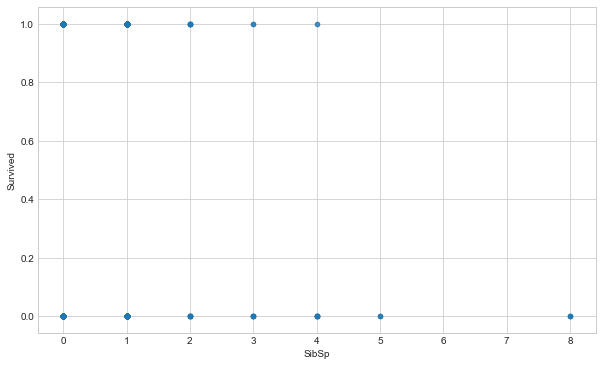

In [29]:
df_train.plot.scatter('SibSp', 'Survived', alpha=0.4)

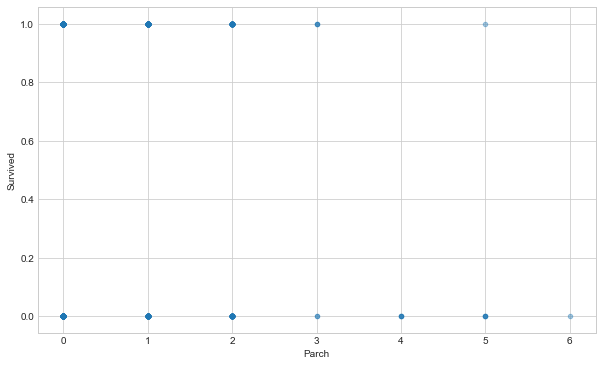

In [30]:
df_train.plot.scatter('Parch', 'Survived', alpha=0.4)

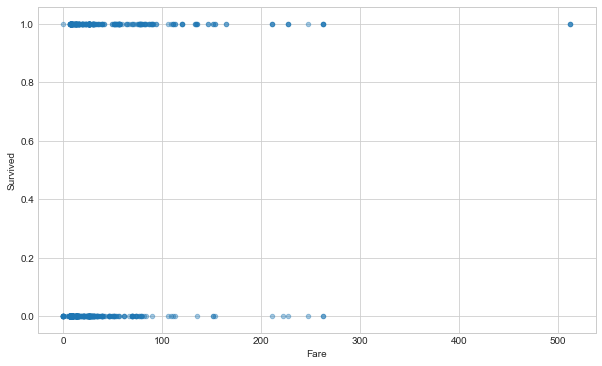

In [31]:
df_train.plot.scatter('Fare', 'Survived', alpha=0.4)

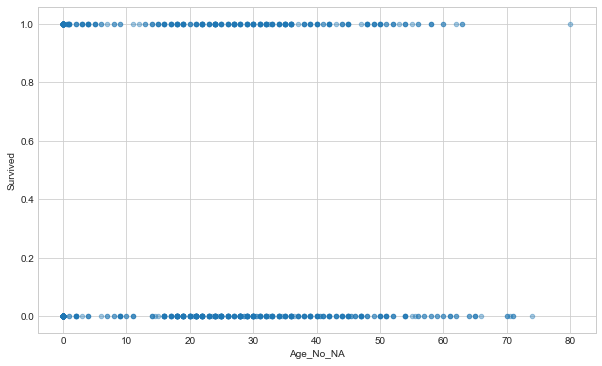

In [32]:
df_train.plot.scatter('Age_No_NA', 'Survived', alpha=0.4)

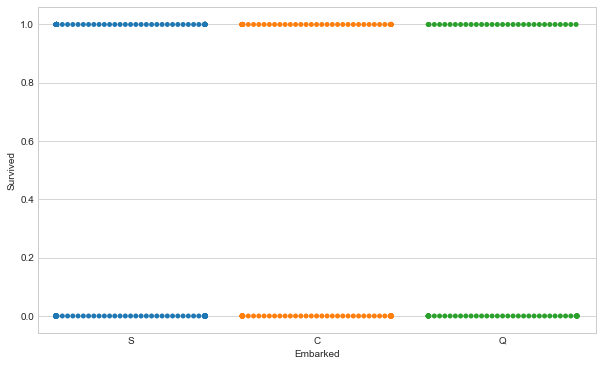

In [33]:
sns.swarmplot("Embarked", "Survived", data=df_train)

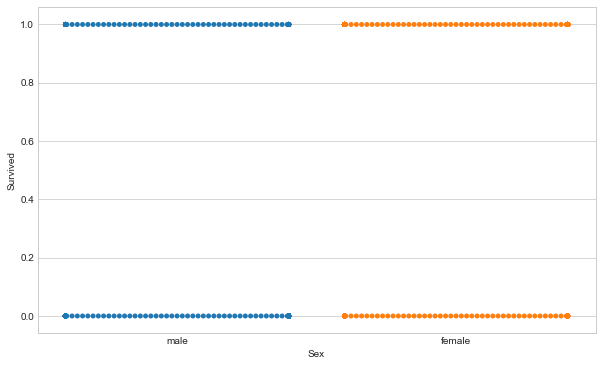

In [34]:
sns.swarmplot("Sex", "Survived", data=df_train)

In [35]:
# Creating a correlation matrix of the dataset
corr_mat = df_train.corr()
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_No_NA
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703,0.036038
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290,0.006323
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193,-0.358174
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,1.000000
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887,-0.183675
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532,-0.047354
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000,0.132830
Age_No_NA,0.036038,0.006323,-0.358174,1.000000,-0.183675,-0.047354,0.132830,1.000000


## Preparing a Baseline Model

In [40]:
X = df_train.iloc[:, [2,4,6,7,9,11,12]].values

In [41]:
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0], dtype=object)

In [42]:
y = df_train.iloc[:, 1].values

In [43]:
# Label Encoding various features.
labelencoder_sex = LabelEncoder()
X[:, 1] = labelencoder_sex.fit_transform(X[:, 1])

In [44]:
labelencoder_embarked = LabelEncoder()
X[:, 5] = labelencoder_embarked.fit_transform(X[:, 5])

In [45]:
# Creating a baseline Random Forest Classifier.
classifier = RandomForestClassifier(n_estimators=200, random_state=42, oob_score=True)

In [50]:
# Performing K-fold Cross-validation.
scores = cross_val_score(estimator=classifier, X=X, y=y, cv=5, scoring='accuracy')

In [51]:
scores

array([0.7753, 0.7978, 0.8427, 0.7753, 0.8418])

In [52]:
scores.mean()

0.8065638291119152

In [53]:
scores.std()

0.030274087853473935

In [54]:
# Fitting the model on whole dataset, for more train samples.
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [55]:
# Classifier's score on the samples which were not seen by the Random Forest algorithm.
# oob_score works as a prediction on a validation or train set.
classifier.oob_score_

0.8110236220472441

## Improving the Baseline model

In [56]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_No_NA'],
      dtype='object')

In [57]:
X_column_names = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_No_NA']

In [58]:
# Checking feature importances of various features.
# Since all the features have significant feature importance, they won't be removed from the model
for name, score in zip(X_column_names, classifier.feature_importances_):
    print(name, score)

Pclass 0.09153164416340522
Sex 0.2585119615274684
SibSp 0.04859843115430098
Parch 0.044964464908067825
Fare 0.27318415605756075
Embarked 0.0341566966899774
Age_No_NA 0.2490526454992194


In [63]:
# Modifying the data by filling the NA values in Age with mean value instead of 0.
df_train['Age_NA_Is_Mean'] = df_train.Age.fillna(df_train.Age.mean())

In [66]:
X = df_train.iloc[:, [2,4,6,7,9,11,13]].values

In [67]:
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0], dtype=object)

In [69]:
y = df_train.iloc[:, 1].values

In [68]:
labelencoder_sex = LabelEncoder()
X[:, 1] = labelencoder_sex.fit_transform(X[:, 1])

labelencoder_embarked = LabelEncoder()
X[:, 5] = labelencoder_embarked.fit_transform(X[:, 5])

In [70]:
classifier2 = RandomForestClassifier(n_estimators=200, random_state=42, oob_score=True)

In [71]:
scores2 = cross_val_score(estimator=classifier2, X=X, y=y, cv=5, scoring='accuracy')

In [75]:
scores2

array([0.7809, 0.7978, 0.8596, 0.7865, 0.8305])

In [76]:
scores2.mean()

0.8110455151399734

In [77]:
scores2.std()

0.029727823417765007

In [78]:
# Since the score increases with this version of the dataset, gonna use this from now onwards. 
classifier2.fit(X, y)
classifier2.oob_score_

0.8155230596175478

In [83]:
# Now I'm gonna check whether Cabin column makes any difference.
df_train['Cabin_No_NA'] = df_train.Cabin.fillna('No cabin information available')

In [118]:
X = df_train.iloc[:, [2,4,6,7,9,11,13,14]].values

In [119]:
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0, 'No cabin information available'],
      dtype=object)

In [120]:
y = df_train.iloc[:, 1].values

In [121]:
labelencoder_sex = LabelEncoder()
X[:, 1] = labelencoder_sex.fit_transform(X[:, 1])

labelencoder_embarked = LabelEncoder()
X[:, 5] = labelencoder_embarked.fit_transform(X[:, 5])

labelencoder_cabin = LabelEncoder()
X[:, 7] = labelencoder_cabin.fit_transform(X[:, 7])

In [122]:
classifier3 = RandomForestClassifier(n_estimators=200, random_state=42, oob_score=True)

In [123]:
scores3 = cross_val_score(estimator=classifier3, X=X, y=y, cv=5, scoring='accuracy')

In [124]:
scores3

array([0.764 , 0.8034, 0.8596, 0.7809, 0.8588])

In [125]:
scores3.mean()

0.8133244461372436

In [126]:
scores3.std()

0.039446010260821104

In [127]:
classifier3.fit(X, y)
classifier3.oob_score_

0.813273340832396

In [128]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_No_NA',
       'Age_NA_Is_Mean', 'Cabin_No_NA'],
      dtype='object')

In [129]:
X_column_names = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_NA_Is_Mean', 
                  'Cabin_No_NA']

In [130]:
# Checking feature importances of various features.
for name, score in zip(X_column_names, classifier3.feature_importances_):
    print(name, score)

Pclass 0.0712978440988385
Sex 0.25103735109486297
SibSp 0.0444357410878252
Parch 0.03681665261194374
Fare 0.22993597319895134
Embarked 0.03158449207389384
Age_NA_Is_Mean 0.2398652949609277
Cabin_No_NA 0.09502665087275652


In [131]:
# Will make another model with One-Hot Encoding of features.
X = df_train.iloc[:, [2,4,6,7,9,11,13,14]].values
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0, 'No cabin information available'],
      dtype=object)

In [132]:
y = df_train.iloc[:, 1].values

In [133]:
labelencoder_sex = LabelEncoder()
X[:, 1] = labelencoder_sex.fit_transform(X[:, 1])

labelencoder_embarked = LabelEncoder()
X[:, 5] = labelencoder_embarked.fit_transform(X[:, 5])

labelencoder_cabin = LabelEncoder()
X[:, 7] = labelencoder_cabin.fit_transform(X[:, 7])

In [134]:
ohe = OneHotEncoder(categorical_features=[1,5])
X = ohe.fit_transform(X).toarray()

In [135]:
X = X[:, [1,3,4,5,6,7,8,9,10]]

In [136]:
classifier4 = RandomForestClassifier(n_estimators=200, random_state=42, oob_score=True)

In [137]:
scores4 = cross_val_score(estimator=classifier4, X=X, y=y, cv=5, scoring='accuracy')

In [138]:
scores4

array([0.7865, 0.7921, 0.8483, 0.7697, 0.8531])

In [139]:
scores4.mean()

0.8099473116231828

In [140]:
scores4.std()

0.03412899260464261

In [142]:
# Will use a different algorithm other than RandomForestClassifier for One-Hot encoded features
# because it performs bad on these features.
# Firstly using a LogisticRegression algorithm

# Standardizing all the features 
sc = StandardScaler()
X = sc.fit_transform(X)

In [144]:
logreg_classifier = LogisticRegression(random_state=42)

In [145]:
scores_logreg = cross_val_score(estimator=logreg_classifier, X=X, y=y, cv=5, scoring='accuracy')

In [146]:
scores_logreg

array([0.7809, 0.7921, 0.7753, 0.764 , 0.8079])

In [147]:
scores_logreg.mean()

0.7840538310163143

In [148]:
scores_logreg.std()

0.014977811197835679

In [151]:
# Now using a SVM algorithm
# SVM with a linear kernel
svm_linear_classifier = SVC(kernel='linear', random_state=0)

In [152]:
scores_linear_svm = cross_val_score(estimator=svm_linear_classifier, X=X, y=y, cv=5, 
                                    scoring='accuracy')

In [153]:
scores_linear_svm

array([0.8034, 0.809 , 0.7865, 0.7528, 0.7853])

In [154]:
scores_linear_svm.mean()

0.7873992255443407

In [155]:
scores_linear_svm.std()

0.01961032272932588

In [156]:
# SVM with a gaussian (rbf) kernel
svm_gaussian_classifier = SVC(kernel='rbf', random_state=0)

In [157]:
scores_gaussian_svm = cross_val_score(estimator=svm_gaussian_classifier, X=X, y=y, cv=5, 
                                    scoring='accuracy')

In [158]:
scores_gaussian_svm

array([0.8315, 0.809 , 0.8146, 0.7978, 0.8701])

In [159]:
scores_gaussian_svm.mean()

0.8245730971878371

In [160]:
scores_gaussian_svm.std()

0.02520994222026764

In [161]:
# RandomForest and Kernel SVM are the best performing models, will try to enhance them now.
# Firstly starting with Kernel SVM model.
# Not using the Cabin column and One-Hot encoding.
X = df_train.iloc[:, [2,4,6,7,9,11,13]].values
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0], dtype=object)

In [162]:
y = df_train.iloc[:, 1].values

In [163]:
labelencoder_sex = LabelEncoder()
X[:, 1] = labelencoder_sex.fit_transform(X[:, 1])

labelencoder_embarked = LabelEncoder()
X[:, 5] = labelencoder_embarked.fit_transform(X[:, 5])

In [165]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [166]:
svm_gaussian_classifier = SVC(kernel='rbf', random_state=0)

In [167]:
scores_gaussian_svm = cross_val_score(estimator=svm_gaussian_classifier, X=X, y=y, cv=5, 
                                    scoring='accuracy')

In [168]:
scores_gaussian_svm

array([0.8315, 0.8202, 0.8146, 0.8034, 0.8644])

In [169]:
scores_gaussian_svm.mean()

0.8268139402018664

In [170]:
scores_gaussian_svm.std()

0.020865419731371064

In [171]:
# Not using the Cabin column but applying One-Hot encoding.
X = df_train.iloc[:, [2,4,6,7,9,11,13]].values
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0], dtype=object)

In [172]:
y = df_train.iloc[:, 1].values

In [173]:
labelencoder_sex = LabelEncoder()
X[:, 1] = labelencoder_sex.fit_transform(X[:, 1])

labelencoder_embarked = LabelEncoder()
X[:, 5] = labelencoder_embarked.fit_transform(X[:, 5])

In [174]:
ohe = OneHotEncoder(categorical_features=[1,5])
X = ohe.fit_transform(X).toarray()

In [176]:
X = X[:, [1,3,4,5,6,7,8,9]]

In [177]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [178]:
svm_gaussian_classifier = SVC(kernel='rbf', random_state=0)

In [179]:
scores_gaussian_svm = cross_val_score(estimator=svm_gaussian_classifier, X=X, y=y, cv=5, 
                                    scoring='accuracy')

In [180]:
scores_gaussian_svm

array([0.8315, 0.8202, 0.8146, 0.7978, 0.8814])

In [181]:
# This configuration is best for Kernel SVM.
scores_gaussian_svm.mean()

0.829080175204723

In [182]:
scores_gaussian_svm.std()

0.02831156937709176

In [184]:
# Now I will perform hyperparameter tuning using GridSearch.
parameters_svm = [{'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
               'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [185]:
grid_search_svm = GridSearchCV(estimator=svm_gaussian_classifier, 
                           param_grid=parameters_svm, 
                           scoring='accuracy', cv=10)

In [186]:
grid_search_svm = grid_search_svm.fit(X, y)

In [188]:
grid_search_svm.best_score_

0.8312710911136107

In [189]:
grid_search_svm.best_params_

{'C': 1, 'gamma': 0.2}

In [197]:
# Further performing hyperparameter tuning using GridSearch.
parameters_svm = [{'C':[0.1, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2], 
               'gamma':[0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28]}]

In [199]:
grid_search_svm = GridSearchCV(estimator=svm_gaussian_classifier, 
                           param_grid=parameters_svm, 
                           scoring='accuracy', cv=10)

In [200]:
grid_search_svm = grid_search_svm.fit(X, y)

In [201]:
grid_search_svm.best_score_

0.8335208098987626

In [202]:
grid_search_svm.best_params_

{'C': 0.75, 'gamma': 0.2}

In [203]:
# Last round of hyperparameter tuning using GridSearch.
parameters_svm = [{'C':[0.65, 0.7, 0.75, 0.8, 0.85, 0.9,], 
               'gamma':[0.19, 0.195, 0.2, 0.25, 0.21]}]

In [204]:
grid_search_svm = GridSearchCV(estimator=svm_gaussian_classifier, 
                           param_grid=parameters_svm, 
                           scoring='accuracy', cv=10)

In [205]:
grid_search_svm = grid_search_svm.fit(X, y)

In [206]:
# Best SVM score on holdout set.
grid_search_svm.best_score_

0.8335208098987626

In [207]:
grid_search_svm.best_params_

{'C': 0.7, 'gamma': 0.21}

In [208]:
# Classifier with the best score in GridSearch.
classifier_gs_svm = grid_search_svm.best_estimator_

In [209]:
# Final Kernel SVM model.
classifier_gs_svm.fit(X, y)

SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.21, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [210]:
# SVM model's score on train set.
classifier_gs_svm.score(X, y)

0.8447694038245219

In [211]:
# Now enhancing the RandomForestClassifier model, on its best configuration.
X = df_train.iloc[:, [2,4,6,7,9,11,13]].values
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0], dtype=object)

In [212]:
y = df_train.iloc[:, 1].values

In [213]:
labelencoder_rf_sex = LabelEncoder()
X[:, 1] = labelencoder_rf_sex.fit_transform(X[:, 1])

labelencoder_rf_embarked = LabelEncoder()
X[:, 5] = labelencoder_rf_embarked.fit_transform(X[:, 5])

In [214]:
classifier_rf = RandomForestClassifier(n_estimators=200, random_state=42, oob_score=True)

In [215]:
scores_rf = cross_val_score(estimator=classifier_rf, X=X, y=y, cv=5, scoring='accuracy')

In [216]:
scores_rf

array([0.7809, 0.7978, 0.8596, 0.7865, 0.8305])

In [217]:
scores_rf.mean()

0.8110455151399734

In [218]:
scores_rf.std()

0.029727823417765007

In [219]:
# Original best score without hyperparameter tuning.
classifier_rf.fit(X, y)
classifier_rf.oob_score_

0.8155230596175478

In [227]:
# Applying Grid Search to find the best model parameters for the classifier_rf.
parameters_rf = [{'n_estimators':[200, 300, 400, 500], 
                  'max_features':[1,2,3,4,5,6,7,'auto']}]

In [228]:
classifier_rf = RandomForestClassifier(random_state=42, oob_score=True)

In [229]:
grid_search_rf = GridSearchCV(estimator=classifier_rf, param_grid=parameters_rf, cv=5)

In [230]:
grid_search_rf = grid_search_rf.fit(X, y)

In [231]:
grid_search_rf.best_score_

0.8200224971878515

In [232]:
grid_search_rf.best_params_

{'max_features': 4, 'n_estimators': 300}

In [233]:
# Classifier with the best score in GridSearch.
classifier_gs_rf = grid_search_rf.best_estimator_

In [234]:
# Fitting X, y to the best classifier, classifier_gs_rf.
classifier_gs_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [235]:
# oob_score using classifier_gs_rf.
classifier_gs_rf.oob_score_

0.8177727784026997

### Selecting the best model
Since the Kernel SVM model gives the best score on train set, it will be used to make predictions on the test set.
* Best Model: classifier_gs_svm

## Further Improvement
The performance can be further improved by using powerful algorithms like XGBoost and LGBM, or using
an Artificial Neural Network.

## Importing the test set

In [236]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Analyzing and modifying the test set

In [237]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [240]:
df_test.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [241]:
df_test.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [242]:
df_test.Age.isnull().sum()

86

In [243]:
# Filling the NA values in Age with mean value in a new column.
df_test['Age_NA_Is_Mean'] = df_test.Age.fillna(df_test.Age.mean())

In [245]:
df_test.SibSp.value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [246]:
df_test.Parch.value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [247]:
df_test[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA_Is_Mean
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,60.5


In [256]:
df_test.Fare.fillna(df_test[(df_test.Embarked == 'S') & (df_test.Pclass == 3) & (df_test.SibSp == 0) 
        & (df_test.Parch == 0)].Fare.mean(), inplace=True)

In [258]:
df_test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [260]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId       418 non-null int64
Pclass            418 non-null int64
Name              418 non-null object
Sex               418 non-null object
Age               332 non-null float64
SibSp             418 non-null int64
Parch             418 non-null int64
Ticket            418 non-null object
Fare              418 non-null float64
Cabin             91 non-null object
Embarked          418 non-null object
Age_NA_Is_Mean    418 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 31.1+ KB


In [273]:
passenger_id = df_test.PassengerId
passenger_id[:5]

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

## Preprocessing the test set for model

In [261]:
X_test = df_test.iloc[:, [1,3,5,6,8,10,11]].values
X_test[0]

array([3, 'male', 0, 0, 7.8292, 'Q', 34.5], dtype=object)

In [262]:
# Label encoding on test set
X_test[:, 1] = labelencoder_sex.transform(X_test[:, 1])
X_test[:, 5] = labelencoder_embarked.transform(X_test[:, 5])

In [264]:
# One-Hot encoding on test set
X_test = ohe.transform(X_test).toarray()

In [266]:
X_test = X_test[:, [1,3,4,5,6,7,8,9]]

In [268]:
# Standardization on test set
X_test = sc.transform(X_test)

## Making predictions on test set

In [274]:
# Making predictions on the test set using classifier_gs_svm
y_pred = classifier_gs_svm.predict(X_test)

In [277]:
# Predictions
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [280]:
# Preparing the submission format for the predictions.
pred_df = pd.concat({'PassengerId': pd.Series(passenger_id), 'Survived': pd.Series(y_pred)}, 
                    axis=1)
pred_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [281]:
# Exporting the predictions to a csv file.
pred_df.to_csv('data/Survival_Prediction.csv', index=False)